In [1]:
import pandas as pd
import numpy as np

In [2]:
# 데이터 가져오기
df = pd.read_csv("서울특별시 코로나19 자치구별 확진자 발생동향.csv", encoding='cp949')
print(df.head(3))
df.info()

         자치구 기준일  종로구 전체  종로구 추가   중구 전체  중구 추가  용산구 전체  용산구 추가  성동구 전체  \
0  2021.10.03.00  1713.0    30.0  1794.0   18.0  2789.0    19.0  2931.0   
1  2021.10.02.00  1683.0    14.0  1776.0   18.0  2770.0    22.0  2910.0   
2  2021.10.01.00  1669.0    23.0  1758.0   22.0  2748.0    15.0  2884.0   

   성동구 추가  광진구 전체  ...  서추구 추가  강남구 전체  강남구 추가  송파구 전체  송파구 추가  강동구 전체  \
0    21.0  3606.0  ...    14.0  7085.0    25.0  6549.0    36.0  3951.0   
1    26.0  3592.0  ...    22.0  7060.0    32.0  6513.0    31.0  3913.0   
2    22.0  3567.0  ...    17.0  7028.0    52.0  6478.0    59.0  3883.0   

   강동구 추가   기타 전체  기타 추가                    수집일  
0    38.0  7342.0  112.0  2021-10-03 12:11:42.0  
1    26.0  7230.0   86.0  2021-10-02 19:11:42.0  
2    42.0  7180.0  120.0  2021-10-01 19:11:42.0  

[3 rows x 54 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 54 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  ----- 

In [3]:
# 데이터 전처리 : "전체 칼럼만 가져오기"
df = df.dropna(how='any')
tmp_col = ["자치구 기준일"] + [n for n in df.columns if "전체" in n]
df = df[tmp_col]
df.head(3)

,자치구 기준일,종로구 전체,중구 전체,용산구 전체,성동구 전체,광진구 전체,동대문구 전체,중랑구 전체,성북구 전체,강북구 전체,...,구로구 전체,금천구 전체,영등포구 전체,동작구 전체,관악구 전체,서초구 전체,강남구 전체,송파구 전체,강동구 전체,기타 전체
0,2021.10.03.00,1713.0,1794.0,2789.0,2931.0,3606.0,3705.0,3838.0,3899.0,2736.0,...,4399.0,2181.0,4611.0,4219.0,5550.0,4347.0,7085.0,6549.0,3951.0,7342.0
1,2021.10.02.00,1683.0,1776.0,2770.0,2910.0,3592.0,3660.0,3810.0,3876.0,2711.0,...,4353.0,2159.0,4575.0,4197.0,5532.0,4333.0,7060.0,6513.0,3913.0,7230.0
2,2021.10.01.00,1669.0,1758.0,2748.0,2884.0,3567.0,3602.0,3778.0,3853.0,2689.0,...,4286.0,2130.0,4535.0,4176.0,5492.0,4311.0,7028.0,6478.0,3883.0,7180.0


In [4]:
# 데이터 전처리 : 칼럼 이름 정리
tmp_col = ["기준일"] + [n.replace("전체","").strip() for n in df.columns if "전체" in n]
df.columns = tmp_col
df.head(3)

,기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
0,2021.10.03.00,1713.0,1794.0,2789.0,2931.0,3606.0,3705.0,3838.0,3899.0,2736.0,...,4399.0,2181.0,4611.0,4219.0,5550.0,4347.0,7085.0,6549.0,3951.0,7342.0
1,2021.10.02.00,1683.0,1776.0,2770.0,2910.0,3592.0,3660.0,3810.0,3876.0,2711.0,...,4353.0,2159.0,4575.0,4197.0,5532.0,4333.0,7060.0,6513.0,3913.0,7230.0
2,2021.10.01.00,1669.0,1758.0,2748.0,2884.0,3567.0,3602.0,3778.0,3853.0,2689.0,...,4286.0,2130.0,4535.0,4176.0,5492.0,4311.0,7028.0,6478.0,3883.0,7180.0


In [5]:
# 데이터 전처리 : 기준일 Date 형 변환
df["기준일"] = df["기준일"].astype('str')
df["기준일"] =  pd.to_datetime(df["기준일"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일     152 non-null    datetime64[ns]
 1   종로구     152 non-null    float64       
 2   중구      152 non-null    float64       
 3   용산구     152 non-null    float64       
 4   성동구     152 non-null    float64       
 5   광진구     152 non-null    float64       
 6   동대문구    152 non-null    float64       
 7   중랑구     152 non-null    float64       
 8   성북구     152 non-null    float64       
 9   강북구     152 non-null    float64       
 10  도봉구     152 non-null    float64       
 11  노원구     152 non-null    float64       
 12  은평구     152 non-null    float64       
 13  서대문구    152 non-null    float64       
 14  마포구     152 non-null    float64       
 15  양천구     152 non-null    float64       
 16  강서구     152 non-null    float64       
 17  구로구     152 non-null    float64       
 18  금천구     15

In [6]:
df.head(3)

,기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
0,2021-10-03,1713.0,1794.0,2789.0,2931.0,3606.0,3705.0,3838.0,3899.0,2736.0,...,4399.0,2181.0,4611.0,4219.0,5550.0,4347.0,7085.0,6549.0,3951.0,7342.0
1,2021-10-02,1683.0,1776.0,2770.0,2910.0,3592.0,3660.0,3810.0,3876.0,2711.0,...,4353.0,2159.0,4575.0,4197.0,5532.0,4333.0,7060.0,6513.0,3913.0,7230.0
2,2021-10-01,1669.0,1758.0,2748.0,2884.0,3567.0,3602.0,3778.0,3853.0,2689.0,...,4286.0,2130.0,4535.0,4176.0,5492.0,4311.0,7028.0,6478.0,3883.0,7180.0


In [7]:
# 조건 검색 : 기준일 10/1 의 종로구
df[df["기준일"]=="2021-10-01"]["종로구"]

2    1669.0
Name: 종로구, dtype: float64

In [8]:
# 조건 검색 : 기준일 10/1 ~ 10/3 의 종로구
df[(df["기준일"]>="2021-10-01") & (df["기준일"]<="2021-10-03")]["종로구"]

0    1713.0
1    1683.0
2    1669.0
Name: 종로구, dtype: float64

In [9]:
# 9월 추출
df_Sep = df[(df["기준일"]>="2021-09-01") & (df["기준일"]<="2021-09-30")]
df_Sep.head()

,기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
3,2021-09-30,1646.0,1736.0,2733.0,2862.0,3534.0,3540.0,3760.0,3811.0,2656.0,...,4232.0,2102.0,4497.0,4149.0,5457.0,4294.0,6976.0,6419.0,3841.0,7060.0
4,2021-09-29,1617.0,1709.0,2705.0,2838.0,3486.0,3487.0,3729.0,3779.0,2607.0,...,4168.0,2064.0,4462.0,4120.0,5418.0,4284.0,6926.0,6356.0,3782.0,7035.0
5,2021-09-28,1594.0,1672.0,2681.0,2814.0,3450.0,3421.0,3704.0,3738.0,2582.0,...,4113.0,2033.0,4419.0,4092.0,5370.0,4265.0,6881.0,6288.0,3731.0,6927.0
6,2021-09-27,1573.0,1649.0,2653.0,2795.0,3417.0,3365.0,3686.0,3684.0,2563.0,...,4055.0,2017.0,4378.0,4068.0,5347.0,4249.0,6831.0,6230.0,3702.0,6863.0
7,2021-09-26,1541.0,1622.0,2640.0,2776.0,3379.0,3336.0,3660.0,3659.0,2535.0,...,3983.0,1998.0,4338.0,4040.0,5310.0,4229.0,6788.0,6176.0,3685.0,6832.0


In [10]:
# Column 데이터를 아래로 unpivot
df_Sep_Unpivot = df_Sep.melt(id_vars=['기준일'], 
             var_name='구',
             value_name='확진자수')
print(df_Sep_Unpivot.head())
print(df_Sep_Unpivot.tail())

         기준일    구    확진자수
0 2021-09-30  종로구  1646.0
1 2021-09-29  종로구  1617.0
2 2021-09-28  종로구  1594.0
3 2021-09-27  종로구  1573.0
4 2021-09-26  종로구  1541.0
           기준일   구    확진자수
775 2021-09-05  기타  6053.0
776 2021-09-04  기타  6029.0
777 2021-09-03  기타  6006.0
778 2021-09-02  기타  5985.0
779 2021-09-01  기타  5955.0


In [11]:
# 기타 구 데이터 제외
df_Sep_Unpivot = df_Sep_Unpivot[df_Sep_Unpivot["구"]!="기타"]
df_Sep_Unpivot.head()

,기준일,구,확진자수
0,2021-09-30,종로구,1646.0
1,2021-09-29,종로구,1617.0
2,2021-09-28,종로구,1594.0
3,2021-09-27,종로구,1573.0
4,2021-09-26,종로구,1541.0


In [12]:
# 한글 깨지지 않게
import matplotlib.pyplot as plt 
import seaborn as sns 
import platform
from matplotlib import font_manager, rc 

plt.rcParams["axes.unicode_minus"] = False 
# %matplotlib inline 
get_ipython().run_line_magic("matplotlib", "inline")

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    rc("font", family="Malgun Gothic")
else:
    print("Unkown system. sorry~~")


In [13]:
# 종로구, 중구, 용산구, 성동구, 광진구만 뽑아서 pivot table
df_tmp = df_Sep_Unpivot[df_Sep_Unpivot["구"].isin(['종로구', '중구', '용산구', '성동구', '광진구'])]
df_tmp = df_tmp.pivot_table(index=["기준일"],columns=["구"], values="확진자수", aggfunc=np.sum)
df_tmp.head()

구,광진구,성동구,용산구,종로구,중구
기준일,,,,,
2021-09-01,2678.0,2291.0,2333.0,1261.0,1213.0
2021-09-02,2698.0,2314.0,2340.0,1267.0,1223.0
2021-09-03,2716.0,2327.0,2350.0,1272.0,1232.0
2021-09-04,2738.0,2343.0,2362.0,1278.0,1244.0
2021-09-05,2762.0,2365.0,2371.0,1280.0,1260.0


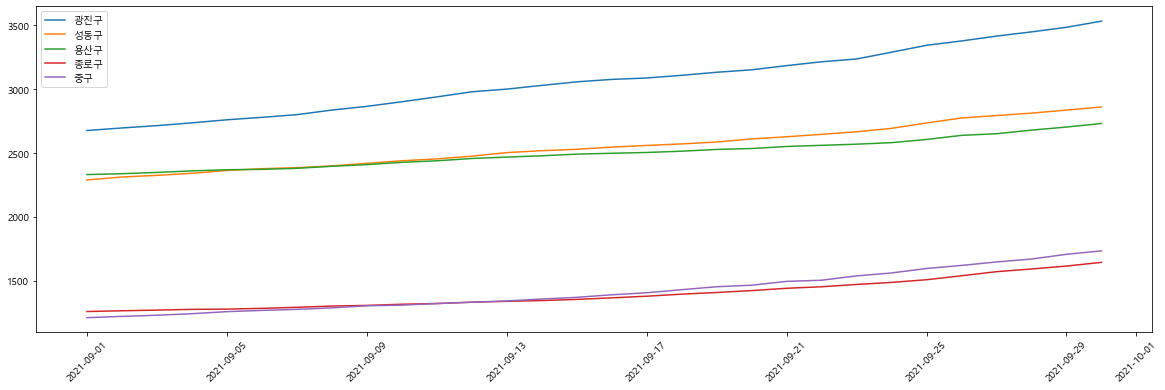

In [14]:
# pivot tabel로 그래프 그리기
plt.figure(figsize=(20, 6))
plt.plot(df_tmp)
plt.xticks(rotation = 45)
plt.legend(df_tmp.columns, loc="best")
plt.grid(False)
plt.show()

In [15]:
import googlemaps
gmaps_key = ""
gmaps = googlemaps.Client(key=gmaps_key)

In [16]:
# 중복되지 않게 구를 출력
df_Sep_Unpivot["구"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [17]:
# 각 구 보건소 별 위도 경도 데이터 가져오기
df_loc = pd.DataFrame(df_Sep_Unpivot["구"].unique(), columns=["구"])
df_loc["lat"] = np.nan
df_loc["lng"] = np.nan

cnt = 1
for idx, rows in df_loc.iterrows():
    tmp_name = rows["구"]
    tmp = gmaps.geocode("서울" + tmp_name + "보건소", language="ko")
    
    tmp_gu = tmp[0].get("formatted_address")
    lat = tmp[0].get("geometry")["location"]["lat"]
    lng = tmp[0].get("geometry")["location"]["lng"]
    
    df_loc.loc[idx, "lat"] = lat 
    df_loc.loc[idx, "lng"] = lng
    print(cnt)
    cnt = cnt + 1 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [18]:
df_loc.head()

,구,lat,lng
0,종로구,37.581769,126.969257
1,중구,37.564542,127.015147
2,용산구,37.532350,126.990361
3,성동구,37.567036,127.033186
4,광진구,37.538373,127.082405


In [19]:
# 9/1 9/30의 종로구 중구 용산구 성동구 광진구 데이터만 뽑기
df_tmp = df_Sep_Unpivot[df_Sep_Unpivot["구"].isin(['종로구', '중구', '용산구', '성동구', '광진구']) 
                  & df_Sep_Unpivot["기준일"].isin(["2021-09-01","2021-09-30"])]
df_tmp

,기준일,구,확진자수
0,2021-09-30,종로구,1646.0
29,2021-09-01,종로구,1261.0
30,2021-09-30,중구,1736.0
59,2021-09-01,중구,1213.0
60,2021-09-30,용산구,2733.0
89,2021-09-01,용산구,2333.0
90,2021-09-30,성동구,2862.0
119,2021-09-01,성동구,2291.0
120,2021-09-30,광진구,3534.0
149,2021-09-01,광진구,2678.0


In [20]:
df_tmp = df_tmp.pivot_table(index=["구"],columns=["기준일"], values="확진자수", aggfunc=np.sum)
df_tmp.head()

기준일,2021-09-01,2021-09-30
구,,
광진구,2678.0,3534.0
성동구,2291.0,2862.0
용산구,2333.0,2733.0
종로구,1261.0,1646.0
중구,1213.0,1736.0


In [21]:
# 1일 대비 30일의 증가율 필드 만들기
# 증가율 필드를 normalization
df_tmp["증가율"] = df_tmp["2021-09-01"] / df_tmp["2021-09-30"]
df_tmp['norm'] = df_tmp["증가율"] / df_tmp["증가율"].max()
df_tmp

기준일,2021-09-01 00:00:00,2021-09-30 00:00:00,증가율,norm
구,,,,
광진구,2678.0,3534.0,0.757782,0.887706
성동구,2291.0,2862.0,0.800489,0.937735
용산구,2333.0,2733.0,0.853641,1.000000
종로구,1261.0,1646.0,0.766100,0.897450
중구,1213.0,1736.0,0.698733,0.818533


In [22]:
# 해당 df와 location 정보 merge
df_merge = pd.merge(df_tmp, df_loc, on="구")
df_merge.head()

,구,2021-09-01 00:00:00,2021-09-30 00:00:00,증가율,norm,lat,lng
0,광진구,2678.0,3534.0,0.757782,0.887706,37.538373,127.082405
1,성동구,2291.0,2862.0,0.800489,0.937735,37.567036,127.033186
2,용산구,2333.0,2733.0,0.853641,1.000000,37.532350,126.990361
3,종로구,1261.0,1646.0,0.766100,0.897450,37.581769,126.969257
4,중구,1213.0,1736.0,0.698733,0.818533,37.564542,127.015147


In [23]:
# folium으로 시각화
import folium
my_map = folium.Map(location=[df_merge["lat"].mean(), df_merge["lng"].mean()], zoom_start=13)
for idx, rows in df_merge.iterrows():
    folium.CircleMarker(
        [rows["lat"], rows["lng"]],
        radius=rows["증가율"] * 60,
        popup=rows["구"] + " : " + "%.2f" % rows["norm"],
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",
    ).add_to(my_map)

In [24]:
my_map